# **Class Imbalanced**

## **Introduction**

**What is Class Imbalanced ?**

> Imbalanced datasets are a common problem in machine learning, where the number of observations in one class is significantly lower than the others

* <mark style = 'background-color : powderblue'> **Class imbalance often appear in machine learing that refers to a scenario in classification problems where the distribution of classes is not uniform** </mark>
*  Imbalanced datasets are those where there is a severe skew in the class distribution, For example, in a dataset for fraud detection, there might be only 1% fraudulent transactions and 99% non-fraudulent transactions
* Imbalanced datasets apply to many types of models, including binary classification, multiclass classification, multilabel classification, and regression

**Why Imbalanced Class is Problem**

1. Bias Towards Majority Class: Algorithms tend to be biased towards the majority class due to its overwhelming presence in the training data.

2. Inaccurate Metrics: Metrics like accuracy can be misleading in imbalanced scenarios. For example, a model could be 99% accurate by predicting only the majority class, but this would ignore the minority class entirely.

3. Underrepresentation of Minority Class: The minority class, which may represent critical outcomes, is underrepresented, leading to poor model performance in predicting those classes.

**Imbalanced class handling technique**

There are several approaches to solving class imbalance problem before starting classification, such as:

1. More samples from the minority class(es) should be acquired from the knowledge domain.

2. Changing the loss function to give the failing minority class a higher cost.

3. Oversampling the minority class.

4. Undersampling the majority class.

5. Any combination of previous approaches.

> The rule of thumb facing imbalanced data : 
* never mess up with your test set. Always split into test and train sets <mark style = 'background-color:powderblue'>**before**</mark> trying oversampling/undersampling techniques!
* <mark style = 'background-color:powderblue'>**accuracy metrics**</mark> never helps in imbalanced dataset.





## **Metrics for Imbalanced**

<p>
    <center>
        <img src = 'https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/evaluation_metrics.png' align='center' width ='800' length ='600'> <br>
        Credit : Marcin Rutecki - https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction
    </center>
</p>

**Why we need consider evaluation metric while facing imbalanced dataset**

<mark style = 'background-color : powderblue'>**1. Accuracy Can Be Misleading** : </mark>
* In a dataset with 95% instances of the majority class and 5% of the minority class, a model that always predicts the majority class will achieve 95% accuracy, despite never identifying any minority class samples correctly. This gives a false sense of performance

<mark style = 'background-color : powderblue'>**2. Focus on Minority Class:**</mark>
* In many imbalanced scenarios, the minority class is more critical to predict accurately (e.g., fraud detection, disease diagnosis, defect detection in manufacturing). Evaluating the performance for this class requires specific metrics.

<mark style = 'background-color : powderblue'> **3. Different Types of Errors Matter:**</mark>
* Imbalanced datasets can lead to different types of errors, such as many false negatives for the minority class. Metrics like precision, recall, and F1-score help to identify how well the model is doing with respect to correctly identifying minority class instances.

**Common metrics used for imbalanced data**

<mark style = 'background-color : powderblue'>**The most common metrics to use for imbalanced datasets are**:</mark>

1. F1 score
2. Precision
3. Recall
4. AUC score (AUC ROC)
5. Average precision score (AP)
6. G-Mean

<mark style = 'background-color : powderblue'>**Choosing metric for imbalanced data**</mark>

<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/metric_imbalanced.png" alt="pict2" >
</p>

## **Dataset**

in this notebook, we will you fraud detection dataset. you can access the dataset through this link : [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv)

* This is the Dictionary of Features of dataset :

    * Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

    * V1 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

    * amount : Transaction amount

    * Class : 1 for fraudulent transactions, 0 otherwise

in this notebook, we don't do any data pre-processing method such as : handling missing value hand, outliers, do data feature transformation etc.

Now, let's talk about some technique that can be used to handle imbalanced data. first, check target proportion.

## **Check Imbalanced Class**

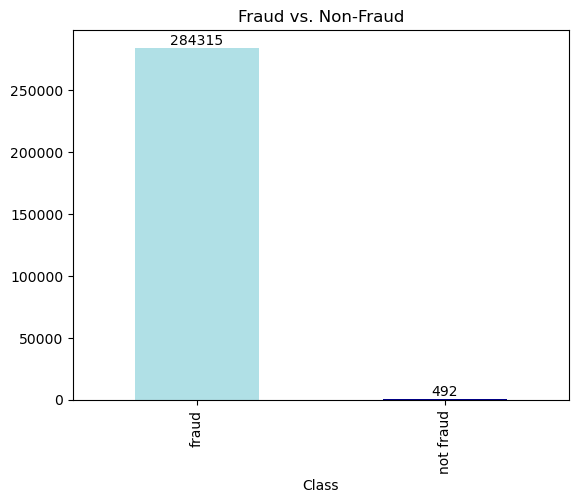

Proportion of each class:
Class
0    99.83%
1     0.17%
Name: count, dtype: object


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/Users/Shared/Cloud Drive/repo_adi/dataset/creditcard.csv')
dataset.head().style.background_gradient(cmap='Blues')

# check data proportion on Class Feature
class_counts = dataset['Class'].value_counts()
class_counts.plot(kind='bar',color=['powderblue','darkblue'], title='Fraud vs. Non-Fraud')
plt.xticks(ticks=dataset['Class'].unique(),labels=['fraud','not fraud'])

# adding label counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

print("====="*30)

percentage_class = class_counts/sum(class_counts)
print(f'Proportion of each class:\n{percentage_class.map(lambda x: "{:.2%}".format(x))}')


notice, target is highly imbalanced. as a fraud transaction is majority and others is minority. let's make a train and test data then build a logistic regression model in order to evaluate effectiveness of imbalanced data handling techniques.


## **Model for Class Imbalanced Evaluation**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define target and features
raw_target = dataset['Class'].copy()  # Target column (Class)
raw_features = dataset.drop(columns=['Class'],axis=1)  # Feature columns

model = LogisticRegression(random_state=42, max_iter=200, penalty='l2')
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(raw_features, raw_target, test_size=0.30)

In [19]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# fit raw_dataset to the model
model_fit = model.fit(X_raw_train, y_raw_train)
y_raw_pred = model_fit.predict(X_raw_test)

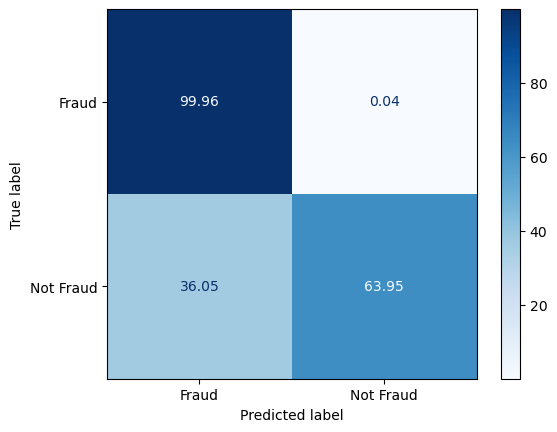

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.73      0.64      0.68       147

    accuracy                           1.00     85443
   macro avg       0.86      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,auc, f1_score,accuracy_score, precision_score, recall_score
import numpy as np

raw_cm = confusion_matrix(y_true=y_raw_test, y_pred=y_raw_pred)

# Normalize confusion matrix to get percentages
raw_cm_normalized = raw_cm.astype(float) / raw_cm.sum(axis=1)[:, np.newaxis] * 100

raw_disp_cm = ConfusionMatrixDisplay(raw_cm_normalized, display_labels=np.where(model.classes_ == 0, 'Fraud', 'Not Fraud'))
raw_disp_cm.plot(cmap='Blues', values_format='.2f')
plt.show()

# print classification report
print(classification_report(y_raw_test, y_raw_pred))


**Note :** The overall accuracy is 1.00, which can be misleading due to class imbalance. Since the dataset is heavily skewed towards the majority class (0), a high accuracy might not reflect the actual performance for the minority class (1).

## **Handling Imbalanced Data**

## 1. Resampling

In general, there are 2 common approaches to random resampling for imbalanced dataset : **Downsampling (Undersampling) and Oversampling**.

Resampling is the most straightforward way to handle imbalanced data, which involves removing samples from the majority class (undersampling) and/or adding more examples from the minority class (oversampling).

Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

> Important Note : Always split into test and train sets BEFORE trying any resampling techniques! **Resampling** before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

## 1.1 Proper Workflow for Handling Imbalanced Datasets with Resampling Techniques:

a. Splitting Data: Begin by using train_test_split to divide the dataset into training and testing sets.

b. Oversampling/Undersampling on Training Set: Once the data is split, **perform oversampling or undersampling only on the training set**. The test set should remain untouched to ensure realistic evaluation results.

c. Training and Evaluation: Train the model on the resampled training data and evaluate its performance on the untouched test set.

## 1.2 Downsampling or Undersampling Method

<mark style = "background-color : powderblue">**With downsampling, we decrease the number of examples from the majority class used during model training.**</mark>

Downsampling is a solution for handling imbalanced datasets by changing the underlying dataset, rather than the model.

you can do downsampling with imbalanced library packages : <mark style = 'background-color : powderblue'>**imblearn.under_sampling**</mark>


**How undersampling works**
* In an imbalanced dataset, the majority class has significantly more samples than the minority class. <mark style = 'background-color : powderblue'>**Downsampling involves randomly removing or discarding some of the majority class samples until the size of the majority class is reduced to match or come closer to the size of the minority class**.</mark>
<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/undersampling.png" alt="pict2" >
</p>

### 1.2.1 Apply Downsampling method on train dataset

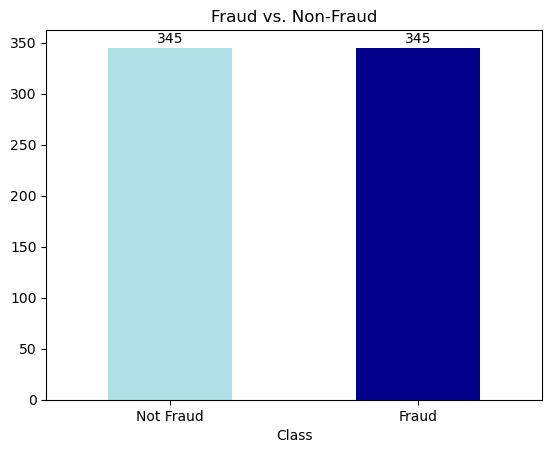

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [61]:
# import packages for visualization
import matplotlib.pyplot as plt

# import downsampling library
from imblearn.under_sampling import RandomUnderSampler

# make downsampling model
downsampling = RandomUnderSampler(sampling_strategy='majority')

# fit downsampling model
down_X_train,down_y_train = downsampling.fit_resample(X=X_raw_train, y=y_raw_train)

# Plot the distribution of undersampling of target data train
under_y_train_count = down_y_train.value_counts()

# Bar plot
under_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Fraud vs. Non-Fraud')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i, count in enumerate(under_y_train_count):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

print("====="*20)

# Display the class distribution in percentage
down_y_train.value_counts(normalize=True)

### 1.2.2 Fit Downsampling train data into Model

/Users/960169/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


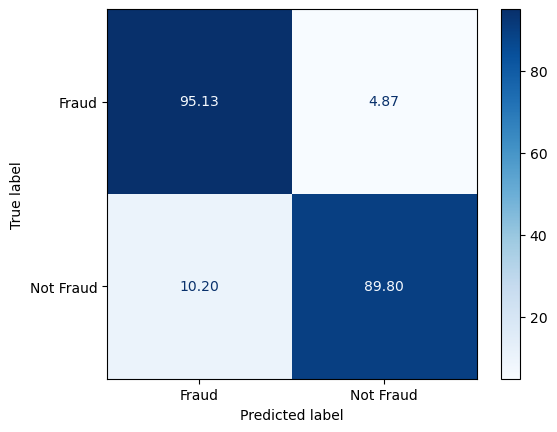

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85296
           1       0.03      0.90      0.06       147

    accuracy                           0.95     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.95      0.97     85443



In [78]:
# isolate target and feature undersampling dataset
down_X_train,down_y_train = down_X_train,pd.DataFrame(down_y_train)

# fit downsampling dataset to the model
downsampling_model_fit = model.fit(down_X_train, down_y_train)
downsampling_y_pred = downsampling_model_fit.predict(X_raw_test)

# evaluate the model
downsampling_cm = confusion_matrix(y_true=y_raw_test, y_pred=downsampling_y_pred)
down_cm_normalized = downsampling_cm.astype(float) / downsampling_cm.sum(axis=1)[:, np.newaxis] * 100
disp_downsampling_cm = ConfusionMatrixDisplay(down_cm_normalized, display_labels=np.where(model.classes_ == 0, 'Fraud', 'Not Fraud'))
disp_downsampling_cm.plot(cmap='Blues', values_format='.2f')
plt.show()

# print classification report
print(classification_report(y_raw_test, downsampling_y_pred))


## 1.3 Oversampling Method

### 1.3.1 Apply Oversampling on Dataset

**What is Random Oversampling Method**

<mark style = "background-color : powderblue">**With Oversampling, we increase the number of examples from the minority class used during model training.**</mark>


you randomly duplicate instances from the minority class to increase its representation in the dataset. This helps balance the class distribution, ensuring that the machine learning model gets more examples of the minority class, which can lead to better predictions for that class. We can use oversampler method from imblearn packages.

**When to Use Random Oversampling Method**

1. Use it when you have a highly imbalanced dataset and you want to improve the model’s ability to predict the minority class.
2. It works well in cases where the cost of missing the minority class (such as fraud detection, medical diagnosis) is high.

**Advantage of Using Random Oversampling Method**

1. Improves Model Performance for the Minority Class: By increasing the representation of the minority class, the model can better recognize patterns in that class, leading to better recall and F1-scores.
2. Simple to Implement: It’s easy to implement and works well in situations where the minority class is underrepresented but critical to predict.
3. Works with Small Datasets: Random oversampling can be effective when the dataset is small and you want to balance the classes without gathering new data.
4. Avoids Data Loss: Unlike undersampling (which reduces the majority class), random oversampling doesn’t discard any data

**Disadvantages of Random Oversampling**

1. Overfitting: The primary risk is overfitting. By replicating the same minority class examples multiple times, the model might become too specialized to those examples, learning specific patterns that don't generalize well to new, unseen data. The model might also become biased toward the repeated minority samples.
2. Increased Computational Cost: Since the dataset size increases with oversampling, this can increase the time needed for training and the computational cost, especially for large datasets.
3. No New Information: Random oversampling doesn't add any new information to the dataset. It merely duplicates existing data, which doesn't help in learning new patterns or generating better insights.
4. Risk of Model Bias: The model might treat oversampled (duplicated) minority class samples as more important than they are, creating potential bias.

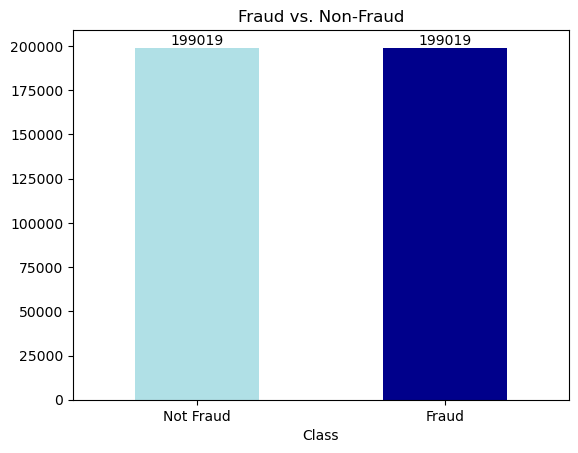

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [86]:
# import packages : oversampler
from imblearn.over_sampling import RandomOverSampler

# make oversampling model
oversampling = RandomOverSampler(sampling_strategy='minority')

# fit oversampling model
over_X_train, over_y_train = oversampling.fit_resample(X=X_raw_train, y=y_raw_train)

# Plot the distribution of oversampling of target data train
over_y_train_count = over_y_train.value_counts()

# Bar plot
over_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Fraud vs. Non-Fraud')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i,count in enumerate(over_y_train_count):
    plt.text(i, count+2,str(count),ha='center',va='bottom',fontsize=10)

plt.show()


print("====="*20)

# Display the class distribution in percentage
over_y_train.value_counts(normalize=True)

### 1.3.2 Fit Oversampling Dataset into Model


/Users/960169/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


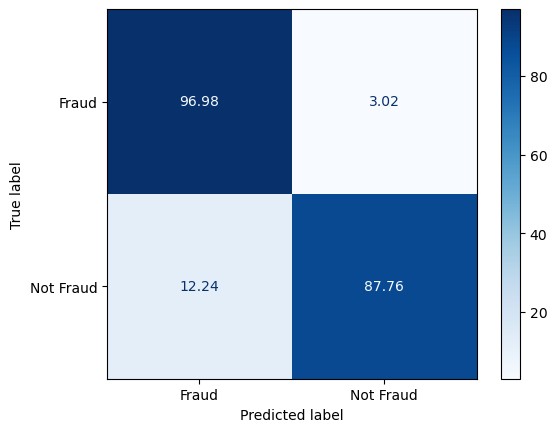

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.05      0.88      0.09       147

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [87]:
# isolate target and feature oversampling dataset
over_X_train,over_y_train = over_X_train, pd.DataFrame(over_y_train)

# fit oversampling dataset to the model
oversampling_model_fit = model.fit(over_X_train, over_y_train)
oversampling_y_pred = oversampling_model_fit.predict(X_raw_test)

# evaluate the model
over_cm = confusion_matrix(y_true=y_raw_test, y_pred=oversampling_y_pred)
over_cm_normalized = over_cm.astype(float) / over_cm.sum(axis=1)[:, np.newaxis] * 100
disp_over_cm = ConfusionMatrixDisplay(over_cm_normalized, display_labels=np.where(model.classes_ == 0, 'Fraud', 'Not Fraud'))
disp_over_cm.plot(cmap='Blues', values_format='.2f')
plt.show()

# print classification report
print(classification_report(y_raw_test, oversampling_y_pred))

# **Performance Comparison**

In [88]:
# make a function that collect metric evaluation by method

def make_results(model_name:str, y_true,y_pred):
    from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

# raw dataset or doesnt apply any imbalanced handling method
baseline_model = make_results(model_name='baseline',y_true=y_raw_test, y_pred=y_raw_pred)

# apply undersampling method
undersampling_method = make_results(model_name='undersampling_method',y_true=y_raw_test, y_pred=downsampling_y_pred)

# apply oversampling method
oversampling_method = make_results(model_name='oversampling_method',y_true=y_raw_test, y_pred=oversampling_y_pred)


collect_results = pd.concat([baseline_model,undersampling_method, oversampling_method]).reset_index(drop=True)
collect_results


,model,precision,recall,F1,accuracy
0,baseline,0.728682,0.639456,0.681159,0.998970
1,undersampling_method,0.030827,0.897959,0.059607,0.951254
2,oversampling_method,0.047742,0.877551,0.090558,0.969676


# **Reference**

1. Best Technique and Metrics for Imbalanced Dataset - Marcin Rutecki :  [Metrics for imbalanced data](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction)

2. Machine Learning Design Patterns - Book by Michael Munn, Sara Robinson, and Valliappa Lakshmana